# COVID-19 Analysis
<br>

In [453]:
import numpy as np
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,32.195406,40.126887,4.663866,5.487395,7.907563,12.050420,17.798319,24.596639,46.873950,51.815126,...,640.327731,645.739496,660.495798,663.739496,668.655462,675.756303,684.008403,695.428571,706.907563,722.798319
std,20.305522,85.839690,40.731714,40.823279,50.733934,70.513714,98.446628,132.578235,326.602349,328.203946,...,5719.809648,5739.840077,5869.872272,5869.724978,5888.220111,5933.815757,5970.524570,6008.333866,6038.385982,6079.237047
min,-40.900600,-123.869500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.447150,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,35.443700,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,7.000000
75%,43.659650,113.487200,0.000000,1.000000,2.000000,3.000000,4.000000,6.000000,8.000000,9.000000,...,80.000000,80.500000,80.500000,90.000000,90.000000,92.000000,93.000000,93.000000,93.500000,101.000000
max,64.963100,174.886000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,62442.000000,62662.000000,64084.000000,64084.000000,64287.000000,64786.000000,65187.000000,65596.000000,65914.000000,66337.000000


In [454]:
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,987,988,989,989,989,989,989,989,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,395,396,399,399,399,400,400,410,410,411
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,567,572,573,575,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,293,293,294,294,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,NaN,Luxembourg,49.8153,6.1296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
115,NaN,Monaco,43.7333,7.4167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
116,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117,"Portland, OR",US,45.5051,-122.6750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [455]:
data_italy = data[data["Country/Region"] == "Italy"]
#data_italy.values[0,[3]]
#type(data_italy.values)
values =[]
for i in range(4,len(data_italy.values[0])):
    values += [data_italy.values[0][i]]
    
values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 20,
 62,
 155,
 229,
 322,
 453,
 655,
 888,
 1128]

In [456]:
dates = []
for x in data_italy:
    dates+= [x]
    
dates = dates[4:]
dates

df = pd.DataFrame( {
    'dates': dates,
    'values' : values,                 
    'el': [i for i in range(1,len(values)+1)]       
                   })

In [457]:
df.head()

,dates,values,el
0,1/22/20,0,1
1,1/23/20,0,2
2,1/24/20,0,3
3,1/25/20,0,4
4,1/26/20,0,5


In [458]:
import plotly.express as px
fig = px.scatter(df,x = "el",y="values", trendline="ols", color="values")
fig.show()

In [459]:
import plotly.express as px
fig = px.line(df,x = "dates", y="values")
fig.show()

## LINEAR REGRESSION with Sklearn

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



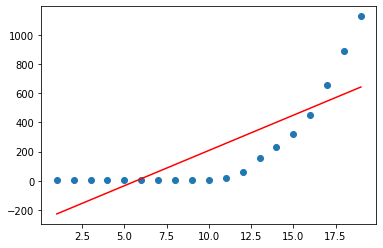

Accuracy: 0.6462621687070127


In [461]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


#rescaling the values to get a better accuracy
df["el"]

j = 1
for i in range(len(df["el"])):
    if(i >= 20):
        df["el"][i]=j
        j+=1
        
X = df.iloc[20:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[20:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
acc = linear_regressor.score(X, Y)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print("Accuracy:" ,acc)


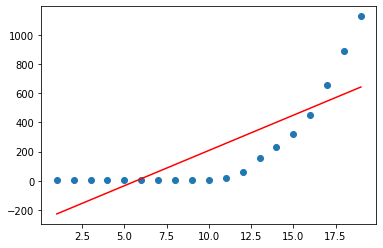

# EVALUATION IN CHINA

In [249]:
data_china = data[data["Country/Region"] == "Mainland China"]
data_china

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20
0,Anhui,Mainland China,31.82570,117.2264,1,9,15,39,60,70,...,987,988,989,989,989,989,989,989,990,990
1,Beijing,Mainland China,40.18240,116.4142,14,22,36,41,68,80,...,395,396,399,399,399,400,400,410,410,411
2,Chongqing,Mainland China,30.05720,107.8740,6,9,27,57,75,110,...,567,572,573,575,576,576,576,576,576,576
3,Fujian,Mainland China,26.07890,117.9874,1,5,10,18,35,59,...,293,293,293,293,293,294,294,296,296,296
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91
5,Guangdong,Mainland China,23.34170,113.4244,26,32,53,78,111,151,...,1332,1333,1339,1342,1345,1347,1347,1347,1348,1349
6,Guangxi,Mainland China,23.82980,108.7881,2,5,23,23,36,46,...,245,246,249,249,251,252,252,252,252,252
7,Guizhou,Mainland China,26.81540,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
8,Hainan,Mainland China,19.19590,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
9,Hebei,Mainland China,38.04280,114.5149,1,1,2,8,13,18,...,307,308,309,311,311,311,312,317,318,318


In [270]:
#data_italy.values[0,[3]]
#type(data_italy.values)
df = {}
for i in range(len(data_china.values)):
    for j in range(4, len(data_china.values[i])):
        df["values"] = [data_china.values[i][j],data_china.values[i]]
pd.DataFrame(df)["values"]

0                                                 1205
1    [Zhejiang, Mainland China, 29.1832, 120.0934, ...
Name: values, dtype: object

In [406]:
data_china.values[1][2]

40.1824

In [ ]:
dates = []
for x in data_italy:
    dates+= [x]
    
dates = dates[4:]
dates

In [428]:
china_cities = []
count = 1
ind = []
for i in range(len(data_china.values)):
    count = 0
    for j in range(len(data_china.values[i][4:])):
                       china_cities+= [data_china.values[i][0]]
                       ind += [count]
                       count += 1

In [429]:
china_values=[]
for i in range(len(data_china.values)):
    for j in range(4,len(data_china.values[i])):      
        china_values+= [data_china.values[i][j]]
             

In [448]:
df_china = pd.DataFrame(list(zip(china_values, china_cities,ind)), 
               columns =['Values', 'Cities','Lags']) 

In [449]:
df_china

,Values,Cities,Lags
0,1,Anhui,0
1,9,Anhui,1
2,15,Anhui,2
3,39,Anhui,3
4,60,Anhui,4
...,...,...,...
1204,1205,Zhejiang,34
1205,1205,Zhejiang,35
1206,1205,Zhejiang,36
1207,1205,Zhejiang,37


In [450]:
import plotly.express as px
fig = px.line(df_china, x="Lags", y = "Values", color="Cities")
fig.show()

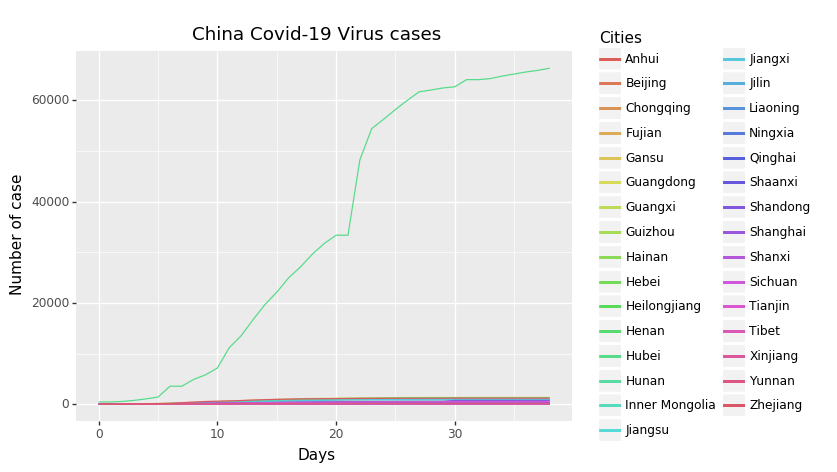

<ggplot: (-9223371882074205360)>

In [451]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
(ggplot(df_china)
 + aes(x='Lags', y='Values', color='Cities')
 + geom_line()
 + labs(title='China Covid-19 Virus cases', x='Days', y='Number of case')
)

In [452]:
import plotly.express as px
fig = px.scatter(df_china, x="Lags", y = "Values", color="Cities",  trendline="ols")
fig.show()

## Hubei Linear regression

In [536]:
df_hubei = df_china[df_china["Cities"] == "Hubei"]
df_hubei = df_hubei.drop(["Cities"],axis=1) 

fig = px.scatter(df_hubei, x="Lags", y = "Values", trendline="ols")
fig.show()

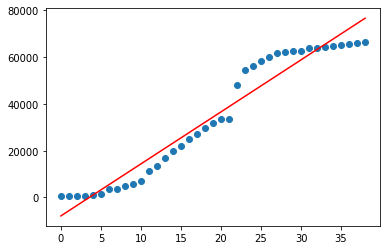

Accuracy: 0.9458346650136403


In [537]:
X = df_hubei.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_hubei.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
acc = linear_regressor.score(X, Y)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print("Accuracy:" ,acc)

In [538]:

predictions = linear_regressor.predict(X)


In [539]:
for x in range(len(predictions)):
    print("Prediction: ",predictions[x],"- Day:", X[x],"- Actual: ", Y[x])

Prediction:  [-7927.82307692] - Day: [0] - Actual:  [444]
Prediction:  [-5703.45587045] - Day: [1] - Actual:  [444]
Prediction:  [-3479.08866397] - Day: [2] - Actual:  [549]
Prediction:  [-1254.72145749] - Day: [3] - Actual:  [761]
Prediction:  [969.64574899] - Day: [4] - Actual:  [1058]
Prediction:  [3194.01295547] - Day: [5] - Actual:  [1423]
Prediction:  [5418.38016194] - Day: [6] - Actual:  [3554]
Prediction:  [7642.74736842] - Day: [7] - Actual:  [3554]
Prediction:  [9867.1145749] - Day: [8] - Actual:  [4903]
Prediction:  [12091.48178138] - Day: [9] - Actual:  [5806]
Prediction:  [14315.84898785] - Day: [10] - Actual:  [7153]
Prediction:  [16540.21619433] - Day: [11] - Actual:  [11177]
Prediction:  [18764.58340081] - Day: [12] - Actual:  [13522]
Prediction:  [20988.95060729] - Day: [13] - Actual:  [16678]
Prediction:  [23213.31781377] - Day: [14] - Actual:  [19665]
Prediction:  [25437.68502024] - Day: [15] - Actual:  [22112]
Prediction:  [27662.05222672] - Day: [16] - Actual:  [24

### Prediction for 01/03/2020, 02/03/2020, 03/03/2020

In [555]:
prediction  = linear_regressor.predict([[39],[40],[41]])
l = 39
for x in prediction:
    print("Giorno ",l,": ",x[0])
    l+=1

Giorno  39 :  78822.49797570852
Giorno  40 :  81046.86518218626
Giorno  41 :  83271.23238866398
